In [ ]:
import numpy as np
import pandas as pd
import re
from urllib.parse import urlparse
import os.path
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("malicious_phish.csv")

In [ ]:
data.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [ ]:
data.isnull().sum()

url     0
type    0
dtype: int64

In [ ]:
data['type'].value_counts()

type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64

**Create bar graphs for the types of urls**

**Data Preprocessing**

URL Length

In [ ]:
def urlLength(url):
  return len(str(url))

data['url_length'] = data['url'].apply(lambda x: urlLength(x))

Hostname Length

In [ ]:
def hostLength(url):
  return len(urlparse(url).netloc)

data['hostname_length'] = data['url'].apply(lambda x: hostLength(x))

www

In [ ]:
def www(url):
  return url.count('www')

data['www'] = data['url'].apply(lambda x: www(x))

https

In [ ]:
def https(url):
  return url.count('https')

data['https'] = data['url'].apply(lambda x: https(x))

http

In [ ]:
def http(url):
  return url.count('http')

data['http'] = data['url'].apply(lambda x: http(x))

dot

In [ ]:
def dot(url):
  return url.count('.')

data['dot'] = data['url'].apply(lambda x: dot(x))

percent

In [ ]:
def percent(url):
  return url.count('%')

data['percent'] = data['url'].apply(lambda x: percent(x))

question

In [ ]:
def question(url):
  return url.count('?')

data['question'] = data['url'].apply(lambda x: question(x))

hyphen

In [ ]:
def hyphen(url):
  return url.count('-')

data['hyphen'] = data['url'].apply(lambda x: hyphen(x))

equal

In [ ]:
def equal(url):
  return url.count('=')

data['equal'] = data['url'].apply(lambda x: equal(x))

at

In [ ]:
def at(url):
  return url.count('@')

data['at'] = data['url'].apply(lambda x: at(x))

directories

In [ ]:
def dir(url):
  return urlparse(url).path.count('/')

data['dir'] = data['url'].apply(lambda x: dir(x))

suspicious words

In [ ]:
def suspiciousWords(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    return 1 if match else 0

data['sus_url'] = data['url'].apply(lambda x: suspiciousWords(x))

digits

In [ ]:
def digits(url):
  return len(re.findall('[0-9]',url))

data['digits'] = data['url'].apply(lambda x: digits(x))

letters

In [ ]:
def letters(url):
  return len(re.findall('[a-zA-Z]',url))

data['letters'] = data['url'].apply(lambda x: letters(x))

**Dataset**

In [ ]:
data.head()

,url,type,url_length,hostname_length,www,https,http,dot,percent,question,hyphen,equal,at,dir,sus_url,digits,letters
0,br-icloud.com.br,phishing,16,0,0,0,0,2,0,0,1,0,0,0,0,0,13
1,mp3raid.com/music/krizz_kaliko.html,benign,35,0,0,0,0,2,0,0,0,0,0,2,0,1,29
2,bopsecrets.org/rexroth/cr/1.htm,benign,31,0,0,0,0,2,0,0,0,0,0,3,0,1,25
3,http://www.garage-pirenne.be/index.php?option=...,defacement,88,21,1,0,1,3,0,1,1,4,0,1,0,7,63
4,http://adventure-nicaragua.net/index.php?optio...,defacement,235,23,0,0,1,2,0,1,1,3,0,1,0,22,199


**Train Test Split**

In [ ]:
y = data['type']
X = data.drop('type', axis = 1)
X = X.drop('url', axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, shuffle=True, random_state=5)

**Models**

In [ ]:
num_folds=10
scoring='accuracy'

In [ ]:
models=[]
models.append(('RFC',RandomForestClassifier()))
models.append(('GB',GradientBoostingClassifier()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))

In [ ]:
result=[]
names=[]
for name,model in models:
    kfold=KFold(n_splits=num_folds)
    cv_results=cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    result.append(cv_results)
    names.append(name)
    msg="%s:%f(%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)

RFC:0.960035(0.001018)
GB:0.936843(0.001052)
LDA:0.846001(0.001035)
KNN:0.939943(0.000805)
NB:0.804164(0.002356)


In [ ]:
df = {'Model': names, 'Accuracy': result}
results = pd.DataFrame(df)

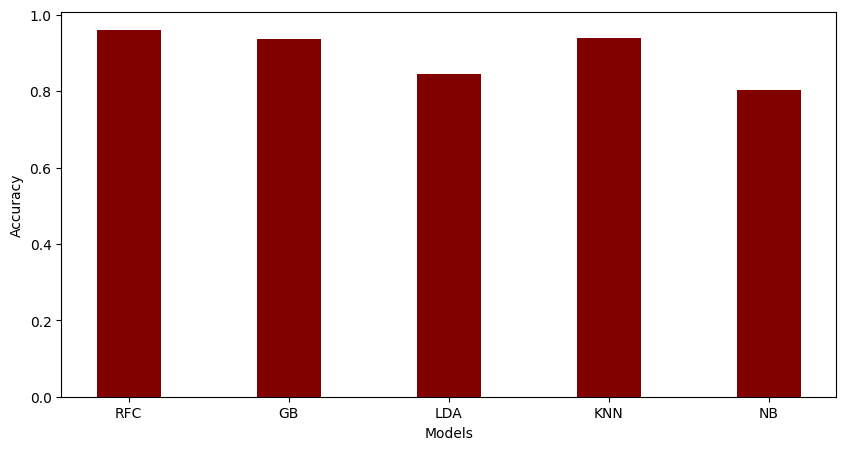

In [ ]:
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(results['Model'], results['Accuracy'], color ='maroon',
        width = 0.4)

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()